In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('../DAT210x/Module5/Datasets/Crimes_-_2001_to_present.csv')

In [9]:
df.head()
df.shape

(14259, 22)

In [10]:
df.dropna(inplace=True)

In [13]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [17]:
df.Date=pd.to_datetime(df.Date, errors='coerce')
df.dtypes

In [40]:
df_post_2011=df.loc[df['Date'] > datetime.datetime(2010,12,31)]

In [3]:
def doKMeans(df, num_clusters):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.TowerLon, df.TowerLat, marker='.', alpha=0.3)

    dfloc=df[['TowerLon', 'TowerLat']]
    
    model=KMeans(n_clusters=num_clusters)
    model.fit(dfloc)
    colorlist=['r', 'k', 'b', 'g']
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c=colorlist, alpha=0.5, linewidths=3, s=169)
#     ax.set_xlim([-97,-96.5])
#     ax.set_ylim([32.5,33])
    plt.show()
    return model

[[-87.66471828  41.77273792]
 [-87.70960437  41.87814277]
 [-87.61948043  41.80340041]
 [-87.68506657  41.98175614]
 [-87.63108338  41.69664745]
 [-87.75688178  41.89341893]
 [-87.5825171   41.75252238]]


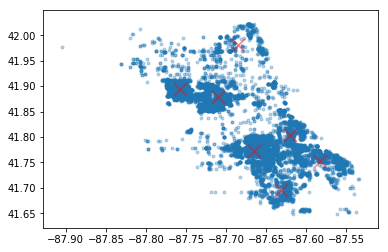

In [51]:
doKMeans(df)

[[-87.71056123  41.87546525]
 [-87.63484765  41.70568973]
 [-87.61874242  41.79213706]
 [-87.6647575   41.77570283]
 [-87.58005937  41.75040247]
 [-87.68726195  41.98359763]
 [-87.75479583  41.88998398]]


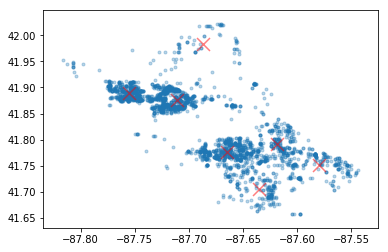

In [47]:
doKMeans(df_post_2011)

In [4]:
df=pd.read_csv('../DAT210x/Module5/Datasets/CDR.csv')
df['CallDate']=pd.to_datetime(df['CallDate'], errors='coerce')
df['CallTime']=pd.to_timedelta(df['CallTime'], errors='coerce')

In [185]:
df.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [5]:
inlist=df['In']
inlist.tolist()
inlist,order=np.unique(inlist, return_index=True)
inlist=inlist[np.argsort(order)]
len(inlist)

10

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


4638472273
(28, 11)
[[-96.70839404  32.73299989]]


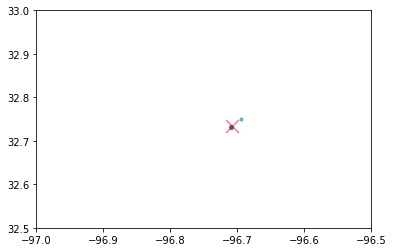

1559410755
(103, 11)
[[-96.92355165  32.87097035]]


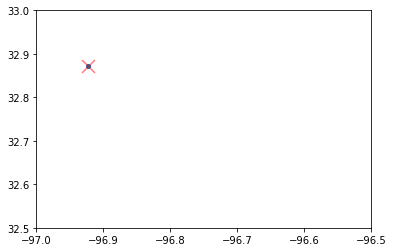

4931532174
(23, 11)
[[-96.86526087  32.86557287]]


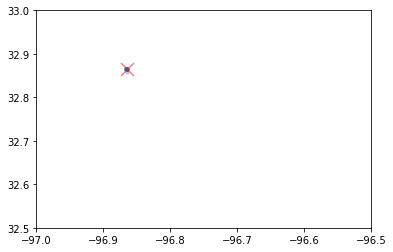

2419930464
(28, 11)
[[-96.83577361  32.84688271]]


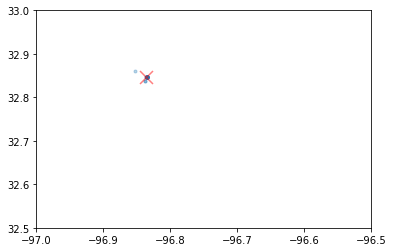

1884182865
(23, 11)
[[-96.73155696  32.87684057]]


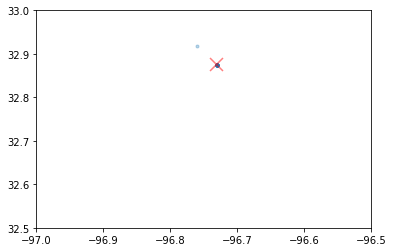

3688089071
(18, 11)
[[-96.685556  32.770833]]


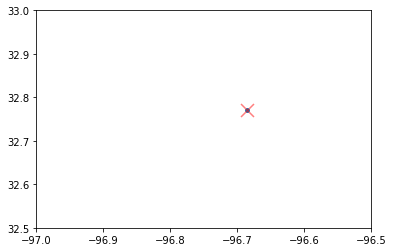

4555003213
(12, 11)
[[-96.84065775  32.70437017]]


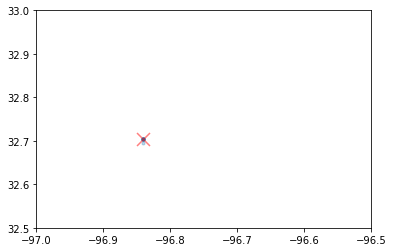

2068627935
(50, 11)
[[-96.604444  32.703056]]


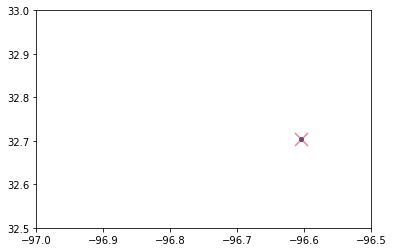

2894365987
(108, 11)
[[-96.81476225  32.77267817]]


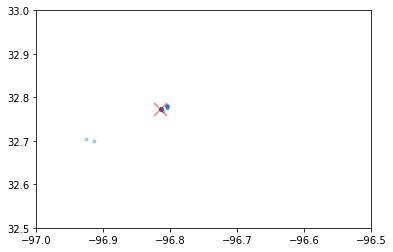

8549533077
(64, 11)
[[-96.78028103  32.77609108]]


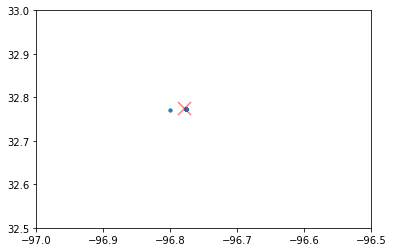

In [183]:
cenlist=[]
for user in inlist:
    userdf=pd.DataFrame()
    userdf=df[df['In']==user]

    userdf.loc[:,'day']=userdf.loc[:,'CallDate'].dt.dayofweek
    userdf_weekends=userdf[userdf['day']>4]
    userdf_weekends_late=userdf_weekends[(userdf_weekends['CallTime']>pd.Timedelta('22:00:00')) | 
                                   (userdf_weekends['CallTime']<pd.Timedelta('6:00:00'))]
    print(user)
    print(userdf_weekends_late.shape)
#     userdf_weekends_late.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
#     userdf_weekends_late_coords=userdf_weekends_late[['TowerLat', "TowerLon"]]

    doKMeans(userdf_weekends_late)
    

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[[-96.90951639  32.9000009 ]
 [-96.70816184  32.73323174]
 [-96.83818346  32.86348712]]


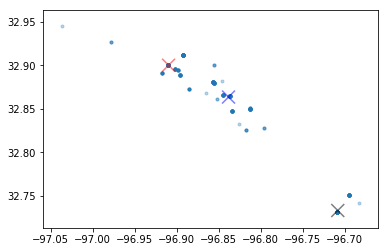


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:53.168115
[[-96.93522725  32.69557708]
 [-96.92355104  32.87096795]
 [-96.9164561   32.73762409]]


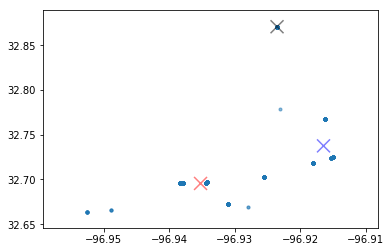


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:50:31.646646
[[-96.89338791  32.77992299]
 [-96.86563953  32.86562866]
 [-96.88911725  32.81309497]]


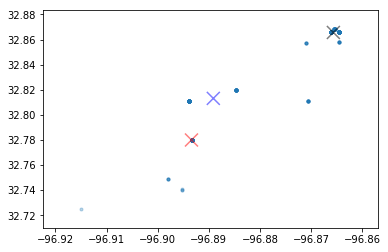


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:53:05.627397
[[-96.83511392  32.84684682]
 [-96.8472893   32.85371225]
 [-96.849683    32.86284941]]


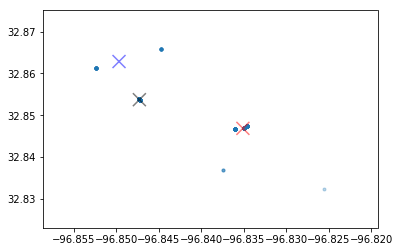


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 11:09:10.422402
[[-96.730278    32.875     ]
 [-96.75768121  32.92195886]
 [-96.741944    32.909167  ]]


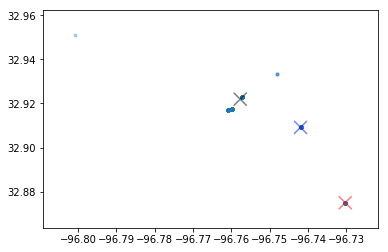


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:48:00.978543
[[-96.685556    32.770833  ]
 [-96.87034706  32.81198486]
 [-96.81450799  32.80241723]]


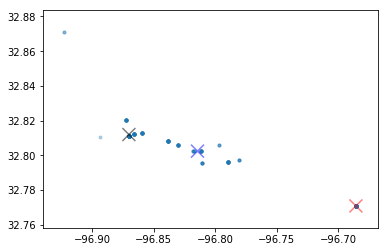


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:46:28.366518
[[-96.74437494  32.75203793]
 [-96.84066398  32.70494423]
 [-96.796111    32.7375    ]]


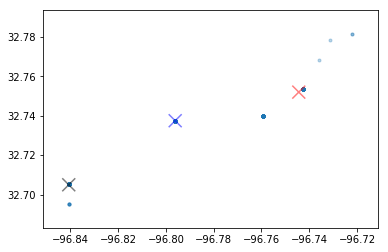


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:58:52.698478
[[-96.83039184  32.72097347]
 [-96.604444    32.703056  ]
 [-96.75520357  32.71410598]]


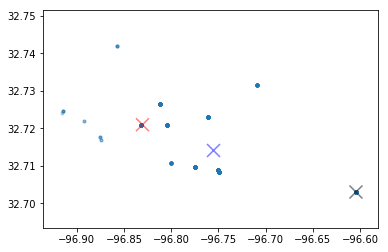


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:09.050047
[[-96.89115458  32.72145328]
 [-96.81270407  32.77396536]
 [-96.857611    32.741889  ]]


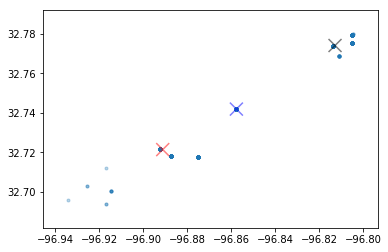


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:48:21.025597
[[-96.77896656  32.77240328]
 [-96.80262338  32.98500948]
 [-96.80360535  32.93033402]]


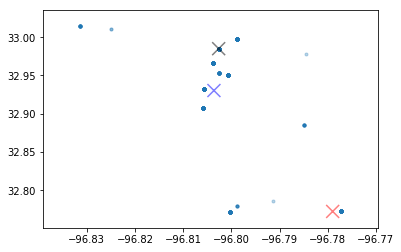


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:51:00.414270


In [24]:
for user in inlist:
    userdf=pd.DataFrame()
    userdf=df[df['In']==user]
    userdf.loc[:,'day']=userdf.loc[:,'CallDate'].dt.dayofweek
    userdf_weekdays=userdf[userdf['day']<5]
    user1=userdf_weekdays[userdf_weekdays['CallTime']<pd.Timedelta('17:00:00')]
    model=doKMeans(user1,3)
#     clusterInfo(model)
    midWayClusterIndices = clusterWithFewestSamples(model)
    midWaySamples = user1[midWayClusterIndices]
    print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())

[[-96.90951639  32.9000009 ]
 [-96.70816184  32.73323174]
 [-96.83818346  32.86348712]]


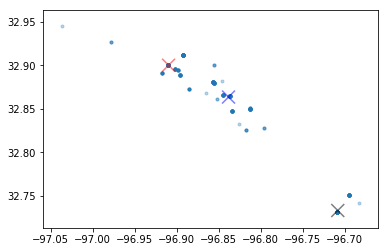

In [13]:
model=doKMeans(user1,3)

In [14]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [15]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

In [16]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:53.168115


In [17]:
clusterInfo(model)

Cluster Analysis Inertia:  0.15891069523780382
------------------------------------------

  Cluster  0
    Centroid  [-96.90951639  32.9000009 ]
    #Samples  959

  Cluster  1
    Centroid  [-96.70816184  32.73323174]
    #Samples  306

  Cluster  2
    Centroid  [-96.83818346  32.86348712]
    #Samples  140


In [20]:
user1['In'].unique

<bound method Series.unique of 197      4638472273
200      4638472273
248      4638472273
249      4638472273
250      4638472273
251      4638472273
321      4638472273
323      4638472273
403      4638472273
406      4638472273
614      4638472273
615      4638472273
616      4638472273
618      4638472273
619      4638472273
620      4638472273
687      4638472273
821      4638472273
857      4638472273
859      4638472273
860      4638472273
1089     4638472273
1090     4638472273
1091     4638472273
1093     4638472273
1094     4638472273
1096     4638472273
1097     4638472273
1171     4638472273
1172     4638472273
            ...    
52431    4638472273
52432    4638472273
52433    4638472273
52434    4638472273
52436    4638472273
52438    4638472273
52439    4638472273
52653    4638472273
52658    4638472273
52659    4638472273
52660    4638472273
52735    4638472273
52737    4638472273
52738    4638472273
52739    4638472273
52842    4638472273
52843    4638472273
52881    

In [23]:
print(inlist)

[4638472273 1559410755 4931532174 2419930464 1884182865 3688089071
 4555003213 2068627935 2894365987 8549533077]
